In [ ]:
import pandas as pd

# IMPORTA ARQUIVO CSV
df = pd.read_csv('/content/Gapminder.csv', error_bad_lines=False, sep=';')

In [ ]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
# RENOMEIA AS COLUNAS
df = df.rename(columns={"country":"pais", "continent": "continente", "year":"Ano", "lifeExp":"Expectativa de Vida","pop":"População Total", "gdpPercap":"PIB"})

In [ ]:
df.head() # SALVA CINCO PRIMEIRAS LINHAS

,pais,continente,Ano,Expectativa de Vida,População Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
df.shape # RETORNA TOTAL DE LINHAS E COLUNAS

(3312, 6)

In [ ]:
df.columns # RETORNA NOME DAS COLUNAS

Index(['pais', 'continente', 'Ano', 'Expectativa de Vida', 'População Total',
       'PIB'],
      dtype='object')

In [ ]:
df.dtypes # retorna tipos dos dados

pais                    object
continente              object
Ano                      int64
Expectativa de Vida    float64
População Total          int64
PIB                    float64
dtype: object

In [ ]:
df.tail() # ULTIMA LINHA, PODE RECEBER PARAMETROS DAS ULTIMAS LINHAS

,pais,continente,Ano,lifeExp,População Total,PIB
3307,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3308,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3309,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3310,Zimbabwe,Africa,2002,39.989,11926563,672.038623
3311,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
df.describe() # informações estastiticas

,Ano,lifeExp,População Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [ ]:
df["continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [ ]:
Oceania = df.loc[df['continente'] == 'Oceania'] # filtro na base de dados
Oceania.head()

,pais,continente,Ano,Expectativa de Vida,População Total,PIB
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


In [ ]:
Oceania['continente'].unique()

array(['Oceania'], dtype=object)

In [ ]:
df.groupby("continente")['pais'].nunique()  # agrupamento de dados 

continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: pais, dtype: int64

In [ ]:
df.groupby('Ano')['Expectativa de Vida'].mean() # retorna a média

In [ ]:
df['PIB'].mean()

11317.115804696637

In [ ]:
df['PIB'].sum()

37482287.5451553

In [ ]:
# TRABALHANDO COM EXCEL

import pandas as pd

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2, df3, df4, df5])
# df.head() 
# df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5) # SELECIONA UMA AMOSTRA DE DADOS

,Cidade,Data,Vendas,LojaID,Qtde
162,Natal,2019-01-02,23.08,1036,2
162,Salvador,2019-01-02,23.08,1036,2
36,Natal,2019-02-09,328.00,853,2
217,Natal,2019-01-02,37.65,1036,2
67,Salvador,2019-01-01,36.89,1037,2


In [ ]:
# ALTERANDO TIPO DE DADO DE UMA COLUNA
df['LojaID'] = df['LojaID'].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#TRATANDO VALORES FALTANDOS
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df['Vendas'].fillna(df["Vendas"].mean(), inplace=True)  # substitui valores nulos pela media

In [ ]:
df['Vendas'].mean()

122.61180089485438

In [ ]:
df['Vendas'].fillna(0, inplace=True) # substitui valores nulos por zero

In [ ]:
df.dropna(inplace=True) #apaga linha com valores nulos
df.dropna(subset=['Vendas'], inplace=True) # paga linha com valores nulos ocm base em 1 coluna
df.dropna(how="all", inplace=True) # removendo linha com valores faltannttes

In [ ]:
# criando nova coluna
df["RECEITA"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receitas/Vendas"] = df["RECEITA"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
df["RECEITA"].max()
df["RECEITA"].min()

3.34

In [ ]:
# nlargest - LINHAS COM MAIOR RECEITA
df.nlargest(3, "RECEITA")

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
# NSAMLLEST - LINHAS COM MENOR RECEITA
df.nsmallest(3, "RECEITA")

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
# AGRUPAMENTO POR CIDADE
df.groupby("Cidade")["RECEITA"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: RECEITA, dtype: float64

In [ ]:
# ORDENAR DADOS
df.sort_values("RECEITA", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [ ]:
#TRANSFORMANDO DATA EM INTEIRO
df["Data"] = df["Data"].astype('int64')
df.head()
# TRANSFORMANDO DATA EM DATA 
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1


In [ ]:
# AGRUPAMENTO POR ANO
df.groupby(df['Data'].dt.year)['RECEITA'].sum()

Data
2018    118176.53
2019    228246.45
Name: RECEITA, dtype: float64

In [ ]:
# CRIANDO COLUNA ANO
df['Ano_Venda'] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas,Ano_Venda
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019
226,Salvador,2019-01-02,38.32,1035,2,76.64,2.0,2019
49,Recife,2019-01-01,122.55,981,1,122.55,1.0,2019
19,Salvador,2019-01-01,167.12,1035,1,167.12,1.0,2019
60,Aracaju,2018-01-01,215.88,1521,3,647.64,3.0,2018


In [ ]:
# extrando mes e dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
227,Salvador,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2
84,Natal,2019-01-02,22.99,1036,1,22.99,1.0,2019,1,2
84,Recife,2019-01-01,36.41,980,6,218.46,6.0,2019,1,1
59,Natal,2018-01-15,369.00,853,2,738.00,2.0,2018,1,15
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2


In [ ]:
df['Data'].min()
df['Data'].max()

In [ ]:
# diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
213,Natal,2019-01-02,42.12,1035,1,42.12,1.0,2019,1,2,366 days
11,Natal,2019-02-09,564.00,853,3,1692.00,3.0,2019,2,9,404 days
73,Natal,2018-01-05,773.00,852,2,1546.00,2.0,2018,1,5,4 days
76,Aracaju,2018-01-01,33.51,1523,4,134.04,4.0,2018,1,1,0 days
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11,406 days


In [ ]:
#CRIANDO COLUNA DE TRIMESTRE
df["trimestre_venda"] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
101,Recife,2019-01-01,172.55,983,7,1207.85,7.0,2019,1,1,365 days,1
15,Recife,2019-01-01,7.45,981,2,14.90,2.0,2019,1,1,365 days,1
32,Fortaleza,2019-01-01,43.33,1004,4,173.32,4.0,2019,1,1,365 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0,2019,3,18,441 days,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1


In [ ]:
# filtrando vendas de 2019 em março
venda_março_19 = df.loc[(df['Data'].dt.year == 2019) & (df["Data"].dt.month ==3)]
venda_março_19

,Cidade,Data,Vendas,LojaID,Qtde,RECEITA,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
### VISUALIZAÇÃO DE DATOS
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

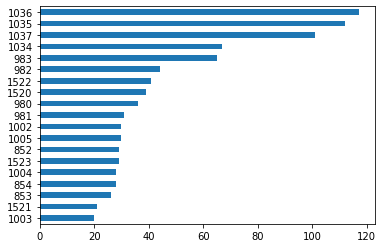

In [ ]:
#GRÁFICO DE BARRAS horizonta
#df["LojaID"].value_counts().plot.barh()
df["LojaID"].value_counts(ascending=True).plot.barh();

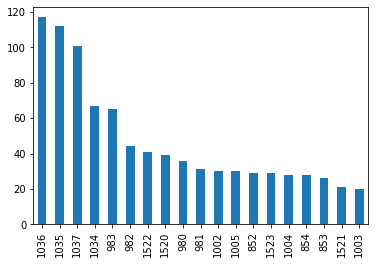

In [ ]:
df["LojaID"].value_counts().plot.bar();

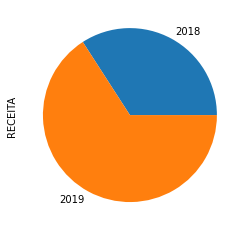

In [ ]:
# GRAFICO DE PIZZA
df.groupby(df['Data'].dt.year)['RECEITA'].sum().plot.pie();

In [ ]:
#TOTAL VENDAS POR CIDADE
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

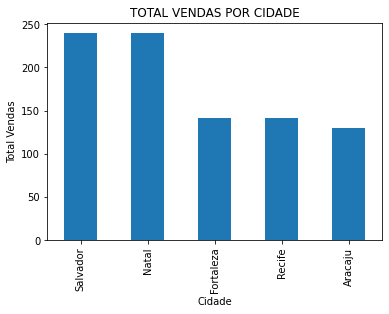

In [ ]:
#adiciona_titulo_altera nome
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="TOTAL VENDAS POR CIDADE")
plt.xlabel("Cidade")
plt.ylabel('Total Vendas');

In [ ]:
#altera cora
df['Cidade'].value_counts().plot.bar(title='Total Vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

NameError: ignored

In [ ]:
#alterando o estilo
plt.style.use('ggplot')

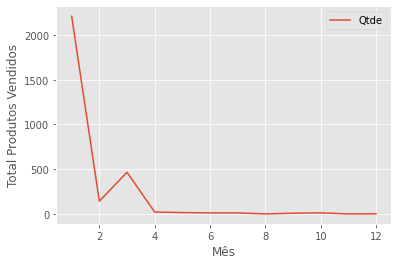

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [ ]:
df_2019 = df[df['Ano_Venda'] == 2019]

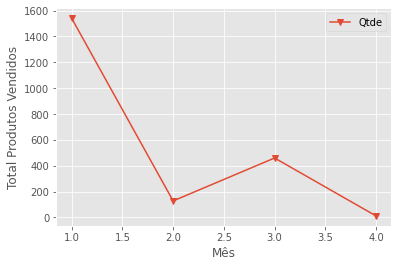

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [ ]:
plt.hist(df['Qtde'], color = 'orangered');
plt.scatter(x=df_2019['Dia_venda'],y= df_2019['Receita'])

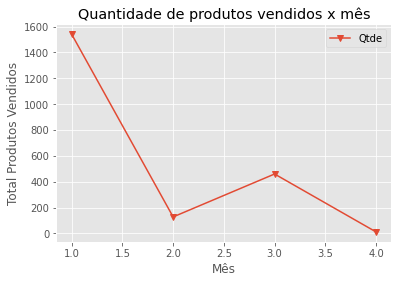

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();
plt.savefig('grafico QTD X MES.png')